In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('/content/Flixpatrol.csv1.csv')
data[data.duplicated()]
rows_with_na=data[data.isna().any(axis=1)]
df=data.dropna()
df[df.isna().any(axis=1)]
#df.head()

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million


In [ ]:
len(df[df['Premiere']==2020]['Title'])

1542

In [ ]:
y

In [ ]:
df["Type"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
df[df["Genre"]=="History"]

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
21,22,Vikings: Valhalla,TV Show,2022.0,History,"20,55,00,000",205.5M
56,57,Bridgerton,TV Show,2020.0,History,"13,66,00,000",136.6M
62,63,Bridgerton,TV Show,2020.0,History,"13,34,00,000",133.4M
76,77,Vikings: Valhalla,TV Show,2022.0,History,"11,65,00,000",116.5M
131,132,The Last Kingdom: Seven Kings Must Die,Movie,2023.0,History,"8,32,00,000",83.2M
...,...,...,...,...,...,...,...
17179,17230,"One Nation, One King",Movie,2018.0,History,"1,00,000",0.1M
17613,17664,The Lion of Flanders,Movie,1985.0,History,"1,00,000",0.1M
17623,17674,Laia,Movie,2016.0,History,"1,00,000",0.1M
18129,18180,Crossed Swords,Movie,1977.0,History,"1,00,000",0.1M


In [ ]:
df.columns

Index(['Rank', 'Title', 'Type', 'Premiere', 'Genre', 'Watchtime',
       'Watchtime in Million'],
      dtype='object')

In [ ]:
### Data Analysis
df.head()

df["Genre"].unique()




array(['Action', 'Drama', 'Thriller', 'Fantasy', 'Crime', 'Reality-Show',
       'Comedy', 'History', 'Superhero', 'Animation', 'Science Fiction',
       'Horror', 'Adventure', 'Documentary', 'War', 'Musical', 'Romance',
       'Family', 'Stand-Up', 'Western', 'Sports', 'Biography',
       'Talk Show', 'Game-Show', 'Broadcast', 'Concerts', 'News',
       'Fairy Tale'], dtype=object)

In [ ]:
len(df["Genre"].unique())

28

In [ ]:
df["Premiere"].unique()

array([2023., 2021., 2022., 2018., 2011., 2020., 2012., 2013., 2010.,
       2016., 2003., 2019., 2008., 2017., 2000., 2004., 2015., 2014.,
       2009., 1996., 2005., 1994., 2007., 2001., 1989., 1997., 2006.,
       2002., 1993., 1999., 1995., 1972., 1983., 1978., 1998., 1974.,
       1986., 1988., 1991., 1976., 1985., 1987., 1992., 1977., 1990.,
       1979., 1973., 1982., 1966., 1984., 1980., 1975., 1940., 1963.,
       1970., 1981., 1964., 1960., 1971., 1968., 1969., 1962., 1954.,
       1961., 1953., 1957., 1956., 1958., 1965., 1951., 1955., 1967.,
       1952.])

In [ ]:
df["Type"].unique()

array(['TV Show', 'Movie'], dtype=object)

**************CUSTOMER A********************
Customer A would like to watch a crime Movie that is premiered between 2000 and 2023 and most viewed . What would be your recommendation?

In [ ]:
df[(df["Genre"]=="Crime")&(df["Premiere"]>=2000)& (df["Premiere"]<=2023)].sort_values(by="Watchtime in Million").tail(1)

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
90,91,The Blacklist,TV Show,2013.0,Crime,"9,99,00,000",99.9M


**************CUSTOMER B************
Customer B would like to watch a historical TV Show that is Premiered between 2010 and 2020 and least viewed.What would be your recommendation?

In [ ]:
df[(df["Genre"]=="History")&(df["Type"]=="TV Show")&(df["Premiere"]>=2010) & (df["Premiere"]<=2020)].sort_values(by="Watchtime in Million").head(5)

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
16887,16938,Beecham House,TV Show,2019.0,History,"1,00,000",0.1M
15301,15352,Victorious Mehmets,TV Show,2018.0,History,"1,00,000",0.1M
13279,13330,The Borgias,TV Show,2011.0,History,"2,00,000",0.2M
13274,13325,The Borgias,TV Show,2011.0,History,"2,00,000",0.2M
12210,12261,The Borgias,TV Show,2011.0,History,"3,00,000",0.3M


In [ ]:
df.columns

Index(['Rank', 'Title', 'Type', 'Premiere', 'Genre', 'Watchtime',
       'Watchtime in Million'],
      dtype='object')

◼ Provide a histogram based on the year, genre, movie,
views etc


<ipython-input-28-7b300ca6e0d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Watchtime in Million']=pd.to_numeric(df["Watchtime in Million"].str.replace('M',''))


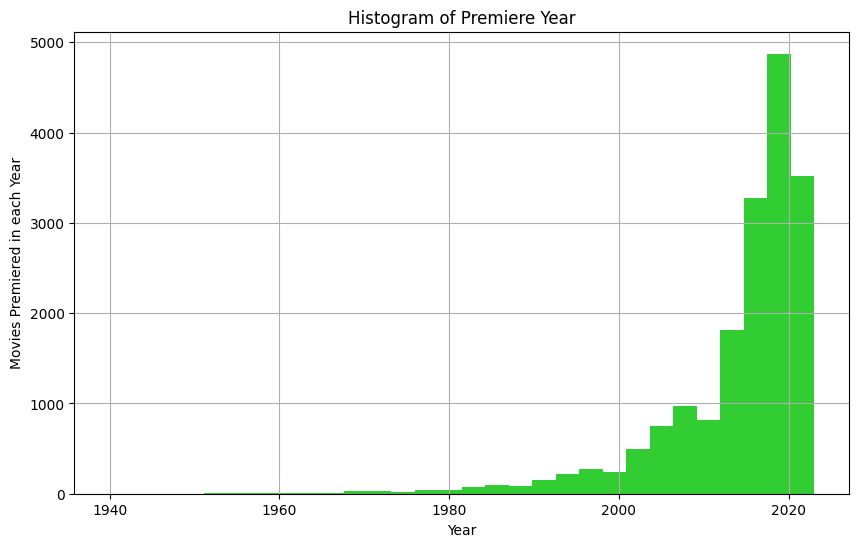

In [ ]:
###◼ Provide a histogram based on the year, genre, movie,views etc
df
# Convert 'views' column to numeric by removing 'M'
df['Watchtime in Million']=pd.to_numeric(df["Watchtime in Million"].str.replace('M',''))
# Histogram for 'premiere' (year)
plt.figure(figsize=(10, 6))
plt.hist(df['Premiere'].dropna(), bins=30, color='Limegreen')
plt.xlabel('Year')
plt.ylabel('Movies Premiered in each Year')
plt.title('Histogram of Premiere Year')
plt.grid(True)
plt.show()

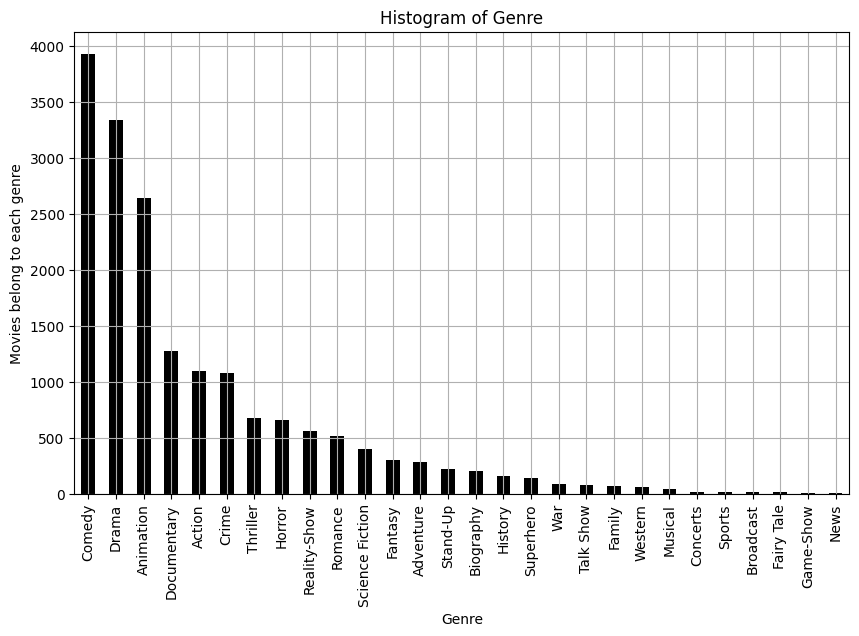

In [ ]:
# Histogram for 'genre'
plt.figure(figsize=(10, 6))
df['Genre'].value_counts().plot(kind='bar', color='black')
plt.xlabel('Genre')
plt.ylabel('Movies belong to each genre')
plt.title('Histogram of Genre')
plt.grid(True)
plt.show()

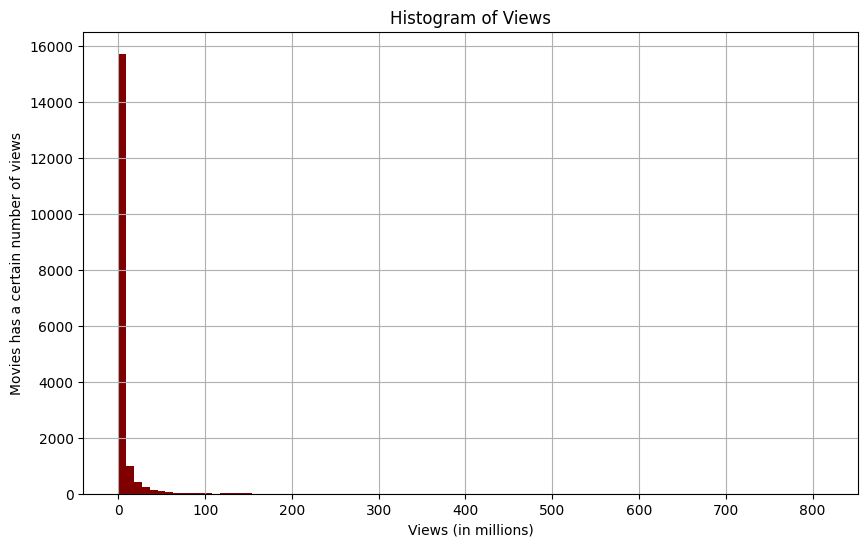

In [ ]:
# Histogram for 'views'
plt.figure(figsize=(10, 6))
plt.hist(df['Watchtime in Million'].dropna(), bins=90, color='maroon')
plt.xlabel('Views (in millions)')
# frequency represent how many movies has a certain number of views
plt.ylabel('Movies has a certain number of views')
plt.title('Histogram of Views')
plt.grid(True)
plt.show()

◼ Create a piece of software in such a way that, it asks the
input from the customer as follows
◼ Type of movie or TV show
◼ Genre
◼ Range of years
◼ Number of views

In [ ]:
# Create a piece of software in such a way that, it asks the input from the customer as follows
# Type of movie or TV show
# Genre
 #Range of years
#Number of views
# Based on the above input, your software should provide a suggested movie to the customer
type=input("Enter the type:")
g=input("genre")
n=int(input(' year starting from n:'))
m=int(input("year end at m:"))
a=(input("views start in million from a:"))
b=(input("views end in million b:"))
xy=df[(df["Type"]==type)&(df["Genre"]==g)&((df["Premiere"]>=n)&(df["Premiere"]<=m))&((df["Watchtime"]>=a)&(df["Watchtime"]<=b))].sort_values(by="Watchtime").tail(1)
xy['T1itle']

***************5 PROBLEMS **********
Design another 5 problems that u can extract information and provide to netflix from this dataset

```
# This is formatted as code
```



In [ ]:
#### 1) In a particular year how many movie and Tv show uploaded by netflix
year=int(input("Give the year in which you want to see the number of uploaded movie and Tv show: "))
dfy=df[df["Premiere"]==year]
dfyu=dfy['Title'].unique()
print(len(dfyu))

Give the year in which you want to see the number of uploaded movie and Tv show: 2023
425


In [ ]:
### 2)In a particular year how much movie and Tv show uploaded of a particular genre
genre=input("Give the genre:")
dfyg=dfy[dfy["Genre"]==genre]
dfygu=dfyg['Title'].unique()
print(len(dfygu))

Give the genre:Comedy
82


In [ ]:
##### 3) In a particular year which  movie has most watched and what is the genre of this movie
year=int(input("give the year:"))
dfy=df[df["Premiere"]==year]
dfyw=dfy.sort_values(by="Watchtime in Million")
dfyws=dfyw.tail(1)

dfywsg=dfyws[dfyws["Premiere"]==year]["Genre"]
print("Genre of movie:",dfywsg)
dfywst=dfyws[dfyws["Premiere"]==year]["Title"]
print("Title of Movie/TV Show :",dfywst)
dfywsty=dfyws[dfyws["Premiere"]==year]["Type"]
print("Type of title",dfywsty)

give the year:2005
Genre of movie: 287    Drama
Name: Genre, dtype: object
Title of Movie/TV Show : 287    Grey's Anatomy
Name: Title, dtype: object
Type of title 287    TV Show
Name: Type, dtype: object


In [ ]:
### 4) comparison between movies and tv shows
year_=int(input("give the year:"))
dfy=df[df["Premiere"]==year_]


dfyt=dfy[dfy['Type']=="TV Show"]#["Title"]#.unique()
dfytu=dfy[dfy['Type']=="TV Show"]["Title"].unique()
dfym=dfy[dfy['Type']=='Movie']#['Title']#.unique()
dfymu=dfy[dfy['Type']=="Movie"]["Title"].unique()
#x = pd.to_numeric(dfym['Watchtime in Million'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#x.mean()  # Calculate the mean

x=pd.to_numeric(dfym["Watchtime in Million"].str.replace('M',''))
x.mean()
y=pd.to_numeric(dfyt['Watchtime in Million'].str.replace('M',''))
y.mean()
#y = pd.to_numeric(dfyt['Watchtime in Million'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#y.mean()  # Calculate the mean

c=dfym.sort_values(by="Watchtime")
e=c.tail(1)["Watchtime"]

d=dfyt.sort_values(by="Watchtime")
f=d.tail(1)["Watchtime"]

print(x.mean())



give the year:2005
6.002127659574468


In [ ]:
dfym["Watchtime in Million"].dtype

dtype('O')

In [ ]:
### Define a Function
def greater(a,b):
  if a>b:
    #print(a,"is greater than",b)
    return a
  elif a<b:
    #print(b,"is greater than",a)
    return b
  else:
    #print(a,"and",b,"both are equal")
    return a

In [ ]:

print("number of movie uploaded is:",len(dfymu))
print("number of TV Show is:",len(dfytu))
a=greater(len(dfym),len(dfyt))
a
print("Most Watched Movie name is:",c.tail(1)["Title"])
print("Most Watched TV Show is:",d.tail(1)["Title"])


print("Watchtime mean of movie is:",x.mean())
print("Watchtime mean of TV Show is:",y.mean())
b=greater(x.mean(),y.mean())
print(b)
print("The most watched movie watchtime is :",e)
print("The most watched Tv Show watchtime is :",f)



number of movie uploaded is: 161
number of TV Show is: 26
Most Watched Movie name is: 2146    Pride & Prejudice
Name: Title, dtype: object
Most Watched TV Show is: 2072    Supernatural
Name: Title, dtype: object
Watchtime mean of movie is: 6.002127659574468
Watchtime mean of TV Show is: 16.892592592592592
16.892592592592592
The most watched movie watchtime is : 2146    92,00,000
Name: Watchtime, dtype: object
The most watched Tv Show watchtime is : 2072    99,00,000
Name: Watchtime, dtype: object


In [ ]:
### 5)In a particular year which type of movie is most watched in the given 7 genres
genre_1=input("Give the first genre")
genre_2=input("Give the second genre")
genre_3=input("Give the third genre")
genre_4=input("Give the fourth genre")
genre_5=input("Give the fifth genre")
genre_6=input("Give the sixth genre")
genre_7=input("Give the seventh genre")

year__=int(input("Give the year:"))
dfyr=df[df["Premiere"]==year__]
dfyrm=dfyr[dfyr["Type"]=="Movie"]
dd=dfyrm[dfyrm["Genre"]==genre_1]
#ddw= pd.to_numeric(dd['Watchtime in Million'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#x=ddw.mean()  # Calculate the mean

ddw=pd.to_numeric(dd["Watchtime in Million"].str.replace('M',''))
print(ddw)
x=ddw.mean()
print(x)


Give the first genreAction
Give the second genreAnimation
Give the third genreScience Fiction
Give the fourth genreThriller
Give the fifth genreHorror
Give the sixth genreDrama
Give the seventh genreAdventure
Give the year:2005
2848     6.5
5046     2.7
5913     2.0
6342     1.7
6441     1.6
7050     1.3
9147     0.7
9618     0.6
10497    0.4
11600    0.3
11769    0.3
11915    0.3
14018    0.2
14638    0.1
16475    0.1
16663    0.1
17537    0.1
18071    0.1
Name: Watchtime in Million, dtype: float64
1.0611111111111111


In [ ]:
da=dfyrm[dfyrm["Genre"]==genre_2]
#daw = pd.to_numeric(da['Watchtime in Million'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#x1=daw.mean()  # Calculate the mean

daw=pd.to_numeric(da["Watchtime in Million"].str.replace('M',''))
x1=daw.mean()

In [ ]:
dan=dfyrm[dfyrm["Genre"]==genre_3]
#danw = pd.to_numeric(dan['Watchtime in Million'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#x2=danw.mean()  # Calculate the mean

danw=pd.to_numeric(dan["Watchtime in Million"].str.replace('M',''))
x2=danw.mean()

In [ ]:
ds=dfyrm[dfyrm["Genre"]==genre_4]
#dsw= pd.to_numeric(ds['Watchtime in Million'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#x3=dsw.mean()  # Calculate the mean

dsw=pd.to_numeric(ds["Watchtime in Million"].str.replace('M',''))
x3=dsw.mean()

In [ ]:
dc=dfyrm[dfyrm["Genre"]==genre_5]
#dcw= pd.to_numeric(dd['Watchtime in Million'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#x4=dcw.mean()  # Calculate the mean

dcw=pd.to_numeric(dd["Watchtime in Million"].str.replace('M',''))
x4=dcw.mean()

In [ ]:
dr=dfyrm[dfyrm["Genre"]==genre_6]
#drw= pd.to_numeric(dr['Watchtime in Million'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#x5=drw.mean()  # Calculate the mean

drw=pd.to_numeric(dr["Watchtime in Million"].str.replace('M',''))
x5=drw.mean()

In [ ]:
dac=dfyrm[dfyrm["Genre"]==genre_7]
#dacw= pd.to_numeric(dac['Watchtime in Million'], errors='coerce')  # Convert to numeric, coerce errors to NaN
#x6=dacw.mean()  # Calculate the mean

dacw=pd.to_numeric(dac["Watchtime in Million"].str.replace('M',''))
x6=dacw.mean()
print(x6)

6.275


In [ ]:
print("Mean of watchtime of ",genre_1," is:",x)
print("Mean of watchtime of ",genre_2," is:",x1)
print("Mean of watchtime of ",genre_3," is:",x2)
print("Mean of watchtime of ",genre_4," is:",x3)
print("Mean of watchtime of", genre_5,"is:",x4)
print("Mean of watchtime of ",genre_6,"is:",x5)
print("Mean of watchtime of ",genre_7," is:",x6)



greater(greater(greater(greater(greater(greater(x,x1),x2),x3),x4),x5),x6)

Mean of watchtime of  Action  is: 1.0611111111111111
Mean of watchtime of  Animation  is: 2.93
Mean of watchtime of  Science Fiction  is: 4.05
Mean of watchtime of  Thriller  is: 0.9083333333333333
Mean of watchtime of Horror is: 1.0611111111111111
Mean of watchtime of  Drama is: 2.3956521739130436
Mean of watchtime of  Adventure  is: 6.275


6.275

◼ If you are employed in Netflix, what would be your
recommendation to purchase a new movie?

In [ ]:
## If you are employed in Netflix,what would be your recommendation to purchase a new movie?

yr=int(input('year'))
dfyr=df[df["Premiere"]==yr]
dfyr.sort_values("Watchtime in Million")['Genre'].tail(1)




year2023


89    Comedy
Name: Genre, dtype: object

In [ ]:
### If you are customer , what would be your complains or recommendation to their movie collection based on this data set
Y=int(input('Year :'))
df[df["Premiere"]==Y]
l1=len(dc)
l2=len(dd)
l3=len(dan)
l4=len(da)
l5=len(ds)
l6=len(dr)
l7=len(dac)
print("no. of comedy movie is:",len(dc))
print("No. of drama movie is:",len(dd))
print("No. of animation movie is:",len(dan))
print("No. of adventure movie is:",len(da))
print("No. of Science Fiction movie is:",len(ds))
print("No. of romance movie is:",len(dr))
print("No. of action movie is:",len(dac))


Year :2005
no. of comedy movie is: 31
No. of drama movie is: 0
No. of animation movie is: 10
No. of adventure movie is: 4
No. of Science Fiction movie is: 8
No. of romance movie is: 9
No. of action movie is: 18


In [ ]:
def smaller(a,b):
  if a<=b:
    return a
  else:
    return b

In [ ]:
smaller(smaller(smaller(smaller(smaller(smaller(l1,l2),l3),l4),l5),l6),l7)

0

In [ ]:
genre=input("Enter which type of movie u want to show:")
df[df["Genre"]==genre]

Enter which type of movie u want to show:Comedy


,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
15,16,Crash Course In Romance,TV Show,2023.0,Comedy,"23,48,00,000",234.8M
17,18,Beef,TV Show,2023.0,Comedy,"22,11,00,000",221.1M
23,24,"XO, Kitty",TV Show,2023.0,Comedy,"20,07,00,000",200.7M
24,25,Doctor Cha,TV Show,2023.0,Comedy,"19,47,00,000",194.7M
28,29,You People,Movie,2023.0,Comedy,"18,18,00,000",181.8M
...,...,...,...,...,...,...,...
18152,18203,My best enemy,Movie,2006.0,Comedy,"1,00,000",0.1M
18157,18208,Patton Oswalt: I Love Everything,Movie,2020.0,Comedy,"1,00,000",0.1M
18158,18209,Rules of Dating,Movie,2005.0,Comedy,"1,00,000",0.1M
18161,18212,The Bishop's Bedroom,Movie,1977.0,Comedy,"1,00,000",0.1M


In [ ]:
df.info('Genre')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  18164 non-null  int64  
 1   Title                 18164 non-null  object 
 2   Type                  18164 non-null  object 
 3   Premiere              18030 non-null  float64
 4   Genre                 17984 non-null  object 
 5   Watchtime             18164 non-null  object 
 6   Watchtime in Million  18164 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 993.5+ KB


In [ ]:
df1=df[df["Type"]=="Movie"]
df1.Genre.unique()

array(['Thriller', 'Crime', 'Action', 'Comedy', 'Adventure', 'Animation',
       'Drama', 'History', 'Musical', 'War', 'Horror', 'Romance',
       'Science Fiction', 'Fantasy', 'Documentary', 'Family', 'Stand-Up',
       'Sports', 'Biography', 'Western', 'Superhero', nan, 'Concerts',
       'Fairy Tale', 'Reality-Show'], dtype=object)